In [1]:
import matplotlib.pyplot as plt
import main as m

In [2]:
model = m.Model()


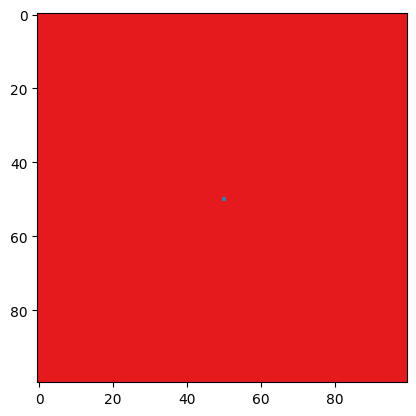

In [3]:
# plot the grid
plt.imshow(model.grid, cmap='Set1')
plt.clim(0,10)
plt.show()

In [4]:
model.loop(1000)

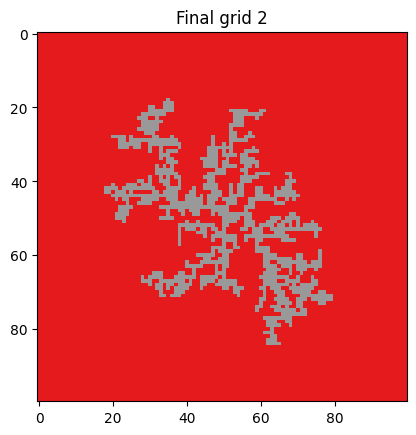

In [5]:
plt.imshow(model.grid, cmap='Set1')
plt.title("Final grid 2")
plt.show()

In [ ]:
print(model.get_fractal_dim())